## ADVANCED PROGRAMMING IN PYTHON GROUP WORK

### PREDICTING CUSTOMER CHURN FOR TELECOMMUNICATIONS COMPANIES IN GHANA

| Name                   | Index Number |
|------------------------|--------------|
| Benedict Ampofo Asamoah| 2425500121   |
| Baidoo Fiifi           | 2425500044   |
| Odoom Nicholas         | 2425500140   |
| Daniel Abankwa         | 2425500143   |
| Elizabeth Edem Nayo    | 2425500036   |
| Otabie Nkum James      | 2425500047   |

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading the data set
df = pd.read_csv(f'GhanaTelecomData.csv')

In [3]:
## Checking the first few rows
df.head()

,AgeGroup,Gender,Education,EmploymentStatus,TelecomCompany,ReasonForChoosing,DurationWithCompany,PlanType,MonthlyCharges,Churn,ChurnReason_NetworkCoverage,ChurnReason_CustomerService,ChurnReason_Pricing,ChurnLikelihood,MonthlyCharges_Numeric,Gender_NuUmeric,AgeGroup_Numeric
0,25-34,Transgender,Primary School,Retired,AirtelTigo,Coverage,1-2 years,Both,GHS 101-200,No,False,False,False,2,4,3,2
1,55-64,Male,High school graduate,Employed part-time,Vodafone,Customer Service,6-12 months,Postpaid,GHS 301-400,Yes,True,True,True,1,,1,5
2,45-54,Female,High school graduate,Employed full-time,MTN,Coverage,3-4 years,Both,GHS 101-200,Yes,False,False,True,2,4,2,4
3,25-34,Transgender,Postgraduate,Self-employed,MTN,Pricing,3-4 years,Postpaid,More than GHS 400,Yes,True,True,False,5,7,3,2
4,25-34,Transgender,Primary School,Employed full-time,Glo,Customer Service,Less than 6 months,Both,More than GHS 400,No,False,True,False,1,7,3,2


In [4]:
## Check the shape
df.shape

(1971, 17)

In [5]:
## Check the overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   AgeGroup                     1971 non-null   object
 1   Gender                       1971 non-null   object
 2   Education                    1971 non-null   object
 3   EmploymentStatus             1971 non-null   object
 4   TelecomCompany               1971 non-null   object
 5   ReasonForChoosing            1971 non-null   object
 6   DurationWithCompany          1971 non-null   object
 7   PlanType                     1971 non-null   object
 8   MonthlyCharges               1971 non-null   object
 9   Churn                        1971 non-null   object
 10  ChurnReason_NetworkCoverage  1971 non-null   bool  
 11  ChurnReason_CustomerService  1971 non-null   bool  
 12  ChurnReason_Pricing          1971 non-null   bool  
 13  ChurnLikelihood              1971

In [6]:
df.describe()

,ChurnLikelihood,Gender_NuUmeric,AgeGroup_Numeric
count,1971.000000,1971.000000,1971.000000
mean,3.150178,2.510908,2.941147
std,1.442915,1.113032,1.416934
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000
50%,3.000000,3.000000,3.000000
75%,5.000000,3.000000,4.000000
max,5.000000,4.000000,5.000000


In [7]:
df.columns

Index(['AgeGroup', 'Gender', 'Education', 'EmploymentStatus', 'TelecomCompany',
       'ReasonForChoosing', 'DurationWithCompany', 'PlanType',
       'MonthlyCharges', 'Churn', 'ChurnReason_NetworkCoverage',
       'ChurnReason_CustomerService', 'ChurnReason_Pricing', 'ChurnLikelihood',
       'MonthlyCharges_Numeric', 'Gender_NuUmeric', 'AgeGroup_Numeric'],
      dtype='object')

In [8]:
df.dtypes

AgeGroup                       object
Gender                         object
Education                      object
EmploymentStatus               object
TelecomCompany                 object
ReasonForChoosing              object
DurationWithCompany            object
PlanType                       object
MonthlyCharges                 object
Churn                          object
ChurnReason_NetworkCoverage      bool
ChurnReason_CustomerService      bool
ChurnReason_Pricing              bool
ChurnLikelihood                 int64
MonthlyCharges_Numeric         object
Gender_NuUmeric                 int64
AgeGroup_Numeric                int64
dtype: object

In [9]:
## Change the 'object' columns into 'category'

In [10]:
df['AgeGroup'] = df['AgeGroup'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Education'] = df['Education'].astype('category')
df['EmploymentStatus'] = df['EmploymentStatus'].astype('category')
df['TelecomCompany'] = df['TelecomCompany'].astype('category')
df['ReasonForChoosing'] = df['ReasonForChoosing'].astype('category')
df['DurationWithCompany'] = df['DurationWithCompany'].astype('category')
df['PlanType'] = df['PlanType'].astype('category')
df['MonthlyCharges'] = df['MonthlyCharges'].astype('category')
df['Churn'] = df['Churn'].astype('category')
df['AgeGroup'] = df['AgeGroup'].astype('category')

In [11]:
## Check the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   AgeGroup                     1971 non-null   category
 1   Gender                       1971 non-null   category
 2   Education                    1971 non-null   category
 3   EmploymentStatus             1971 non-null   category
 4   TelecomCompany               1971 non-null   category
 5   ReasonForChoosing            1971 non-null   category
 6   DurationWithCompany          1971 non-null   category
 7   PlanType                     1971 non-null   category
 8   MonthlyCharges               1971 non-null   category
 9   Churn                        1971 non-null   category
 10  ChurnReason_NetworkCoverage  1971 non-null   bool    
 11  ChurnReason_CustomerService  1971 non-null   bool    
 12  ChurnReason_Pricing          1971 non-null   bool    
 13  Chu

In [12]:
df.size

33507

In [13]:
## Check for NULL values
df.isna().sum()

AgeGroup                       0
Gender                         0
Education                      0
EmploymentStatus               0
TelecomCompany                 0
ReasonForChoosing              0
DurationWithCompany            0
PlanType                       0
MonthlyCharges                 0
Churn                          0
ChurnReason_NetworkCoverage    0
ChurnReason_CustomerService    0
ChurnReason_Pricing            0
ChurnLikelihood                0
MonthlyCharges_Numeric         0
Gender_NuUmeric                0
AgeGroup_Numeric               0
dtype: int64

In [14]:
## Check for duplicates
duplicates = df[df.duplicated()]
duplicates

,AgeGroup,Gender,Education,EmploymentStatus,TelecomCompany,ReasonForChoosing,DurationWithCompany,PlanType,MonthlyCharges,Churn,ChurnReason_NetworkCoverage,ChurnReason_CustomerService,ChurnReason_Pricing,ChurnLikelihood,MonthlyCharges_Numeric,Gender_NuUmeric,AgeGroup_Numeric
11,25-34,Transgender,Postgraduate,Self-employed,MTN,Pricing,3-4 years,Postpaid,More than GHS 400,Yes,True,True,False,5,7,3,2
13,25-34,Transgender,Postgraduate,Self-employed,MTN,Pricing,3-4 years,Postpaid,More than GHS 400,Yes,True,True,False,5,7,3,2
14,25-34,Transgender,Postgraduate,Self-employed,MTN,Pricing,3-4 years,Postpaid,More than GHS 400,Yes,True,True,False,5,7,3,2
15,25-34,Transgender,Postgraduate,Self-employed,MTN,Pricing,3-4 years,Postpaid,More than GHS 400,Yes,True,True,False,5,7,3,2
29,25-34,Transgender,Postgraduate,Self-employed,MTN,Pricing,3-4 years,Postpaid,More than GHS 400,Yes,True,True,False,5,7,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,25-34,Transgender,Postgraduate,Self-employed,MTN,Pricing,3-4 years,Postpaid,More than GHS 400,Yes,True,True,False,5,7,3,2
1929,25-34,Transgender,Postgraduate,Self-employed,MTN,Pricing,3-4 years,Postpaid,More than GHS 400,Yes,True,True,False,5,7,3,2
1937,25-34,Transgender,Postgraduate,Self-employed,MTN,Pricing,3-4 years,Postpaid,More than GHS 400,Yes,True,True,False,5,7,3,2
1957,25-34,Transgender,Postgraduate,Self-employed,MTN,Pricing,3-4 years,Postpaid,More than GHS 400,Yes,True,True,False,5,7,3,2


In [15]:
## Remove the duplicates
df.drop_duplicates(inplace = True)

In [16]:
df.size

31331

In [17]:
df.shape

(1843, 17)

In [18]:
df['Gender']

0       Transgender
1              Male
2            Female
3       Transgender
4       Transgender
           ...     
1966         Female
1967           Male
1968         Female
1969         Female
1970         Female
Name: Gender, Length: 1843, dtype: category
Categories (4, object): ['Female', 'Male', 'Prefer not to say', 'Transgender']

In [19]:
df['TelecomCompany']

0       AirtelTigo
1         Vodafone
2              MTN
3              MTN
4              Glo
           ...    
1966           Glo
1967           MTN
1968      Vodafone
1969           MTN
1970    AirtelTigo
Name: TelecomCompany, Length: 1843, dtype: category
Categories (4, object): ['AirtelTigo', 'Glo', 'MTN', 'Vodafone']

In [20]:
df['MonthlyCharges']

0             GHS 101-200
1             GHS 301-400
2             GHS 101-200
3       More than GHS 400
4       More than GHS 400
              ...        
1966            GHS 20-50
1967          GHS 301-400
1968          GHS 301-400
1969    More than GHS 200
1970          GHS 201-300
Name: MonthlyCharges, Length: 1843, dtype: category
Categories (8, object): ['GHS 101-200', 'GHS 20-50', 'GHS 201-300', 'GHS 301-400', 'GHS 51-100', 'Less than GHS 20', 'More than GHS 200', 'More than GHS 400']

In [21]:
df['Churn']

0        No
1       Yes
2       Yes
3       Yes
4        No
       ... 
1966    Yes
1967    Yes
1968     No
1969    Yes
1970    Yes
Name: Churn, Length: 1843, dtype: category
Categories (2, object): ['No', 'Yes']

In [22]:
df.rename(columns={'Gender_NuUmeric': 'Gender_Numeric'}, inplace=True)
df.head()

,AgeGroup,Gender,Education,EmploymentStatus,TelecomCompany,ReasonForChoosing,DurationWithCompany,PlanType,MonthlyCharges,Churn,ChurnReason_NetworkCoverage,ChurnReason_CustomerService,ChurnReason_Pricing,ChurnLikelihood,MonthlyCharges_Numeric,Gender_Numeric,AgeGroup_Numeric
0,25-34,Transgender,Primary School,Retired,AirtelTigo,Coverage,1-2 years,Both,GHS 101-200,No,False,False,False,2,4,3,2
1,55-64,Male,High school graduate,Employed part-time,Vodafone,Customer Service,6-12 months,Postpaid,GHS 301-400,Yes,True,True,True,1,,1,5
2,45-54,Female,High school graduate,Employed full-time,MTN,Coverage,3-4 years,Both,GHS 101-200,Yes,False,False,True,2,4,2,4
3,25-34,Transgender,Postgraduate,Self-employed,MTN,Pricing,3-4 years,Postpaid,More than GHS 400,Yes,True,True,False,5,7,3,2
4,25-34,Transgender,Primary School,Employed full-time,Glo,Customer Service,Less than 6 months,Both,More than GHS 400,No,False,True,False,1,7,3,2


In [23]:
df.groupby(['Gender', 'ChurnLikelihood']).size()

Gender             ChurnLikelihood
Female             1                   85
                   2                  105
                   3                   87
                   4                   74
                   5                  102
Male               1                   95
                   2                   96
                   3                  106
                   4                  100
                   5                   98
Prefer not to say  1                   83
                   2                   96
                   3                   98
                   4                  121
                   5                   81
Transgender        1                   85
                   2                   89
                   3                   63
                   4                   93
                   5                   86
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 1970
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   AgeGroup                     1843 non-null   category
 1   Gender                       1843 non-null   category
 2   Education                    1843 non-null   category
 3   EmploymentStatus             1843 non-null   category
 4   TelecomCompany               1843 non-null   category
 5   ReasonForChoosing            1843 non-null   category
 6   DurationWithCompany          1843 non-null   category
 7   PlanType                     1843 non-null   category
 8   MonthlyCharges               1843 non-null   category
 9   Churn                        1843 non-null   category
 10  ChurnReason_NetworkCoverage  1843 non-null   bool    
 11  ChurnReason_CustomerService  1843 non-null   bool    
 12  ChurnReason_Pricing          1843 non-null   bool    
 13  ChurnLik

In [25]:
df['Churn']

0        No
1       Yes
2       Yes
3       Yes
4        No
       ... 
1966    Yes
1967    Yes
1968     No
1969    Yes
1970    Yes
Name: Churn, Length: 1843, dtype: category
Categories (2, object): ['No', 'Yes']

In [26]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [27]:
df['Churn']

0       0
1       1
2       1
3       1
4       0
       ..
1966    1
1967    1
1968    0
1969    1
1970    1
Name: Churn, Length: 1843, dtype: category
Categories (2, int64): [0, 1]

In [28]:
df['Churn'] = df['Churn'].astype('int64')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 1970
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   AgeGroup                     1843 non-null   category
 1   Gender                       1843 non-null   category
 2   Education                    1843 non-null   category
 3   EmploymentStatus             1843 non-null   category
 4   TelecomCompany               1843 non-null   category
 5   ReasonForChoosing            1843 non-null   category
 6   DurationWithCompany          1843 non-null   category
 7   PlanType                     1843 non-null   category
 8   MonthlyCharges               1843 non-null   category
 9   Churn                        1843 non-null   int64   
 10  ChurnReason_NetworkCoverage  1843 non-null   bool    
 11  ChurnReason_CustomerService  1843 non-null   bool    
 12  ChurnReason_Pricing          1843 non-null   bool    
 13  ChurnLik

In [30]:
df[['MonthlyCharges_Numeric', 'MonthlyCharges']]

,MonthlyCharges_Numeric,MonthlyCharges
0,4,GHS 101-200
1,,GHS 301-400
2,4,GHS 101-200
3,7,More than GHS 400
4,7,More than GHS 400
...,...,...
1966,2,GHS 20-50
1967,,GHS 301-400
1968,,GHS 301-400
1969,6,More than GHS 200


In [31]:
df['MonthlyCharges_Numeric'].isna().sum()

0

In [32]:
df['MonthlyCharges_Numeric']

0       4
1        
2       4
3       7
4       7
       ..
1966    2
1967     
1968     
1969    6
1970    5
Name: MonthlyCharges_Numeric, Length: 1843, dtype: object

In [33]:
df['MonthlyCharges_Numeric'].replace(' ', 0, inplace = True)
df['MonthlyCharges_Numeric'].replace('1', 1, inplace = True)
df['MonthlyCharges_Numeric'].replace('2', 2, inplace = True)
df['MonthlyCharges_Numeric'].replace('3', 3, inplace = True)
df['MonthlyCharges_Numeric'].replace('4', 4, inplace = True)
df['MonthlyCharges_Numeric'].replace('5', 5, inplace = True)
df['MonthlyCharges_Numeric'].replace('6', 6, inplace = True)
df['MonthlyCharges_Numeric'].replace('7', 7, inplace = True)

In [34]:
df['MonthlyCharges_Numeric'] = df['MonthlyCharges_Numeric'].astype('int64')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 1970
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   AgeGroup                     1843 non-null   category
 1   Gender                       1843 non-null   category
 2   Education                    1843 non-null   category
 3   EmploymentStatus             1843 non-null   category
 4   TelecomCompany               1843 non-null   category
 5   ReasonForChoosing            1843 non-null   category
 6   DurationWithCompany          1843 non-null   category
 7   PlanType                     1843 non-null   category
 8   MonthlyCharges               1843 non-null   category
 9   Churn                        1843 non-null   int64   
 10  ChurnReason_NetworkCoverage  1843 non-null   bool    
 11  ChurnReason_CustomerService  1843 non-null   bool    
 12  ChurnReason_Pricing          1843 non-null   bool    
 13  ChurnLik

In [36]:
df['Education']

0             Primary School
1       High school graduate
2       High school graduate
3               Postgraduate
4             Primary School
                ...         
1966            Postgraduate
1967    High school graduate
1968          Primary School
1969            Postgraduate
1970          Primary School
Name: Education, Length: 1843, dtype: category
Categories (6, object): ['High school graduate', 'No Education', 'Postgraduate', 'Prefer not to say', 'Primary School', 'Undergraduate']

In [37]:
df['MonthlyCharges']

0             GHS 101-200
1             GHS 301-400
2             GHS 101-200
3       More than GHS 400
4       More than GHS 400
              ...        
1966            GHS 20-50
1967          GHS 301-400
1968          GHS 301-400
1969    More than GHS 200
1970          GHS 201-300
Name: MonthlyCharges, Length: 1843, dtype: category
Categories (8, object): ['GHS 101-200', 'GHS 20-50', 'GHS 201-300', 'GHS 301-400', 'GHS 51-100', 'Less than GHS 20', 'More than GHS 200', 'More than GHS 400']

In [38]:
max(df['MonthlyCharges'])

'More than GHS 400'

In [39]:
def extract_numeric(value):
    # Remove "GHS" and any extra spaces
    value = value.replace('GHS', '').strip()

    # Handle the case of a range (e.g., '101-200')
    if '-' in value:
        lower, upper = value.split('-')
        return (int(lower) + int(upper)) / 2  # Taking the average of the range
    
    # Handle the case for "More than" or "Less than" values
    elif 'More than' in value:
        return 400  # Assuming the upper bound is 400 for "More than GHS 400"
    elif 'Less than' in value:
        return 20  # Assuming the lower bound is 20 for "Less than 20"
    
    # If it's a single value (e.g., '300')
    return float(value)

# Apply the function to the 'MonthlyCharges' column
df['Monthly_Charges'] = df['MonthlyCharges'].apply(extract_numeric)


In [40]:
df['Monthly_Charges']

0       150.5
1       350.5
2       150.5
3       400.0
4       400.0
        ...  
1966     35.0
1967    350.5
1968    350.5
1969    400.0
1970    250.5
Name: Monthly_Charges, Length: 1843, dtype: float64

In [41]:
df.head()

,AgeGroup,Gender,Education,EmploymentStatus,TelecomCompany,ReasonForChoosing,DurationWithCompany,PlanType,MonthlyCharges,Churn,ChurnReason_NetworkCoverage,ChurnReason_CustomerService,ChurnReason_Pricing,ChurnLikelihood,MonthlyCharges_Numeric,Gender_Numeric,AgeGroup_Numeric,Monthly_Charges
0,25-34,Transgender,Primary School,Retired,AirtelTigo,Coverage,1-2 years,Both,GHS 101-200,0,False,False,False,2,4,3,2,150.5
1,55-64,Male,High school graduate,Employed part-time,Vodafone,Customer Service,6-12 months,Postpaid,GHS 301-400,1,True,True,True,1,0,1,5,350.5
2,45-54,Female,High school graduate,Employed full-time,MTN,Coverage,3-4 years,Both,GHS 101-200,1,False,False,True,2,4,2,4,150.5
3,25-34,Transgender,Postgraduate,Self-employed,MTN,Pricing,3-4 years,Postpaid,More than GHS 400,1,True,True,False,5,7,3,2,400.0
4,25-34,Transgender,Primary School,Employed full-time,Glo,Customer Service,Less than 6 months,Both,More than GHS 400,0,False,True,False,1,7,3,2,400.0


In [42]:
df.drop(columns = 'MonthlyCharges', inplace = True)

In [43]:
df.head()

,AgeGroup,Gender,Education,EmploymentStatus,TelecomCompany,ReasonForChoosing,DurationWithCompany,PlanType,Churn,ChurnReason_NetworkCoverage,ChurnReason_CustomerService,ChurnReason_Pricing,ChurnLikelihood,MonthlyCharges_Numeric,Gender_Numeric,AgeGroup_Numeric,Monthly_Charges
0,25-34,Transgender,Primary School,Retired,AirtelTigo,Coverage,1-2 years,Both,0,False,False,False,2,4,3,2,150.5
1,55-64,Male,High school graduate,Employed part-time,Vodafone,Customer Service,6-12 months,Postpaid,1,True,True,True,1,0,1,5,350.5
2,45-54,Female,High school graduate,Employed full-time,MTN,Coverage,3-4 years,Both,1,False,False,True,2,4,2,4,150.5
3,25-34,Transgender,Postgraduate,Self-employed,MTN,Pricing,3-4 years,Postpaid,1,True,True,False,5,7,3,2,400.0
4,25-34,Transgender,Primary School,Employed full-time,Glo,Customer Service,Less than 6 months,Both,0,False,True,False,1,7,3,2,400.0


In [44]:
df['DurationWithCompany']

0                1-2 years
1              6-12 months
2                3-4 years
3                3-4 years
4       Less than 6 months
               ...        
1966       5 or more years
1967             1-2 years
1968    Less than 6 months
1969           6-12 months
1970       5 or more years
Name: DurationWithCompany, Length: 1843, dtype: category
Categories (5, object): ['1-2 years', '3-4 years', '5 or more years', '6-12 months', 'Less than 6 months']

In [45]:
# Create the mapping for 'DurationWithCompany'
duration_map = {
    'Less than 6 months': 0,
    '6-12 months': 1,
    '1-2 years': 2,
    '3-4 years': 3,
    '5 or more years': 4
}

# Apply the mapping to the 'DurationWithCompany' column
df['DurationWithCompany_Numeric'] = df['DurationWithCompany'].map(duration_map)

# Check the result
df[['DurationWithCompany', 'DurationWithCompany_Numeric']].head()


,DurationWithCompany,DurationWithCompany_Numeric
0,1-2 years,2
1,6-12 months,1
2,3-4 years,3
3,3-4 years,3
4,Less than 6 months,0


In [46]:
## Distribution of Cat Data

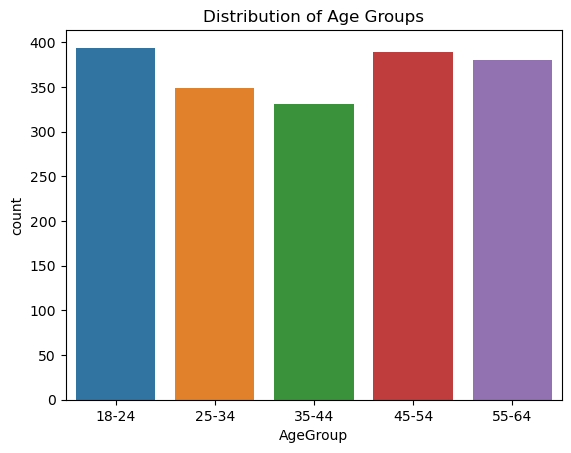

In [47]:
sns.countplot(x='AgeGroup', data=df)
plt.title('Distribution of Age Groups')
plt.show()

In [48]:
## Univariate Analysis

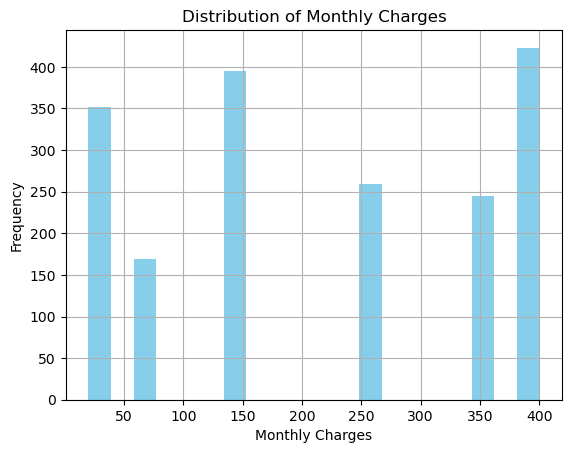

In [49]:
df['Monthly_Charges'].hist(bins=20, color='skyblue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

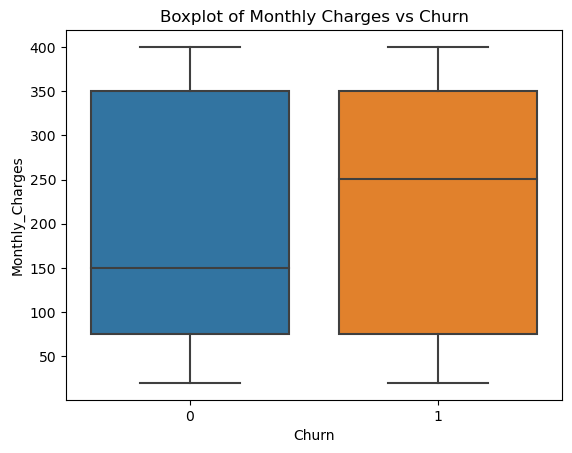

In [50]:
sns.boxplot(x='Churn', y='Monthly_Charges', data=df)
plt.title('Boxplot of Monthly Charges vs Churn')
plt.show()

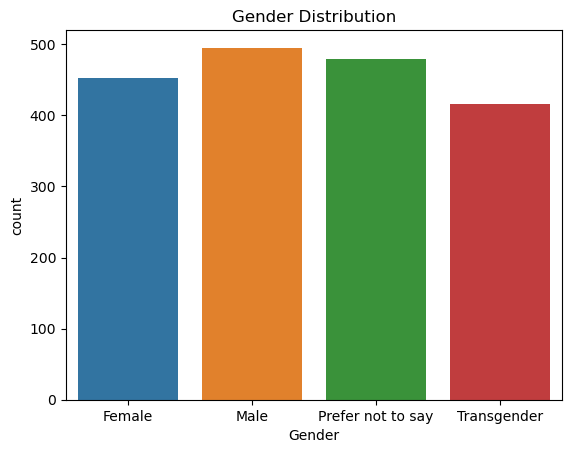

In [51]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [52]:
## Bivariate Analysis

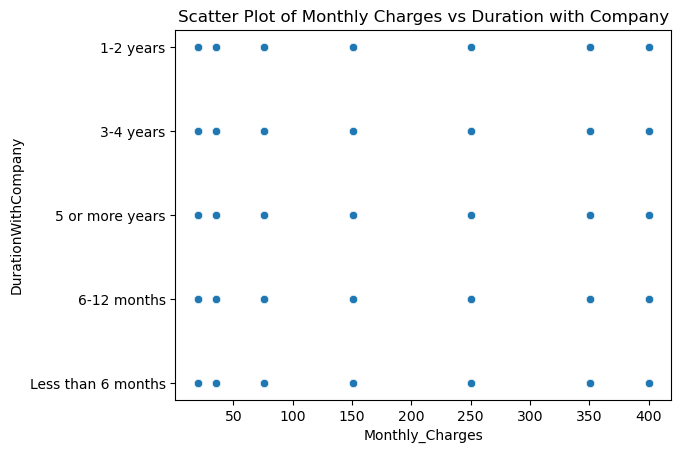

In [53]:
sns.scatterplot(x='Monthly_Charges', y='DurationWithCompany', data=df)
plt.title('Scatter Plot of Monthly Charges vs Duration with Company')
plt.show()

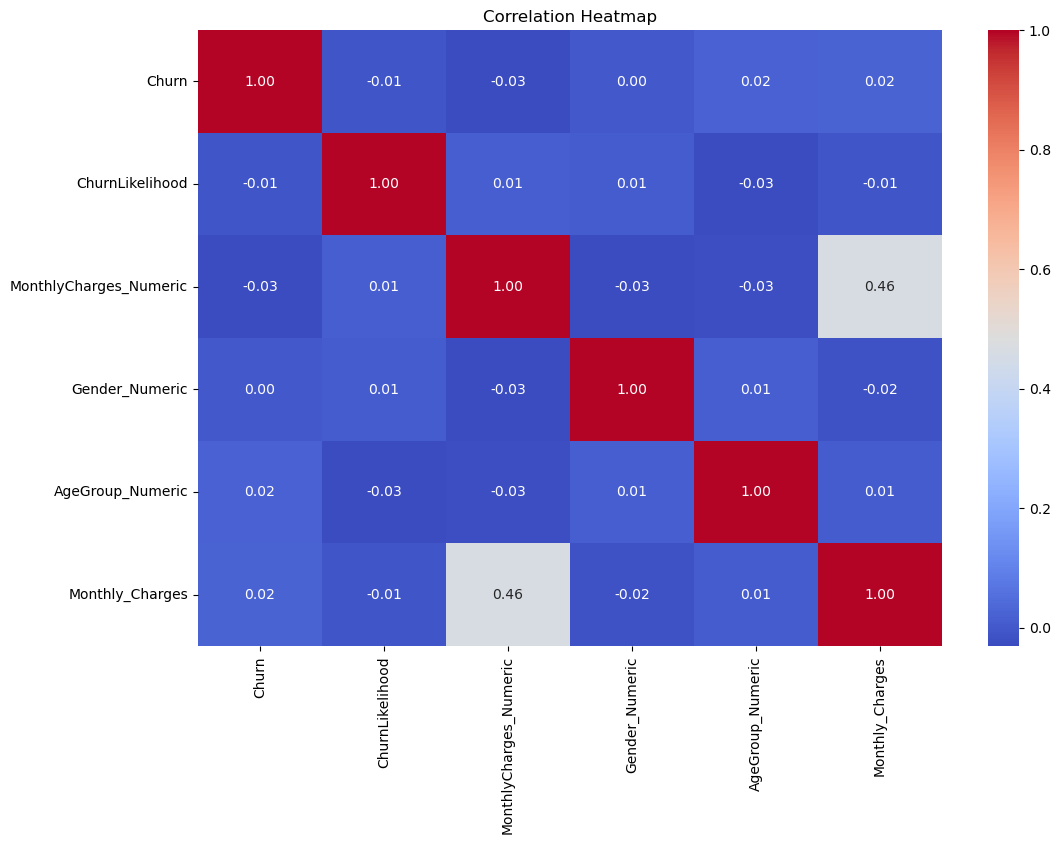

In [54]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

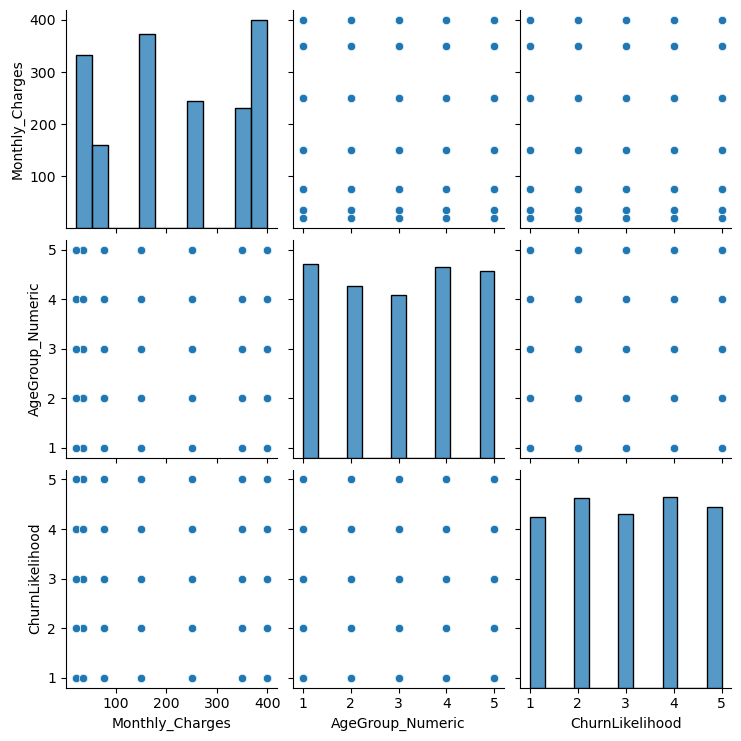

In [55]:
sns.pairplot(df[['Monthly_Charges', 'DurationWithCompany', 'AgeGroup_Numeric', 'ChurnLikelihood']])
plt.show()

In [56]:
## Multivariate Analysis

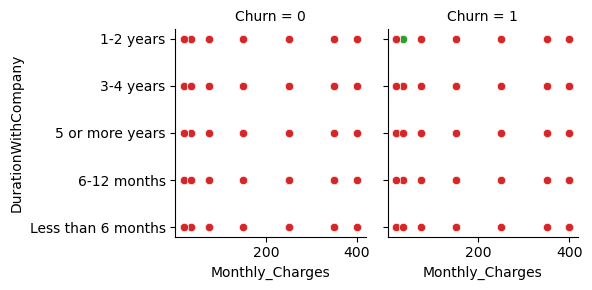

In [57]:
g = sns.FacetGrid(df, col='Churn', hue='Gender')
g.map(sns.scatterplot, 'Monthly_Charges', 'DurationWithCompany')
plt.show()

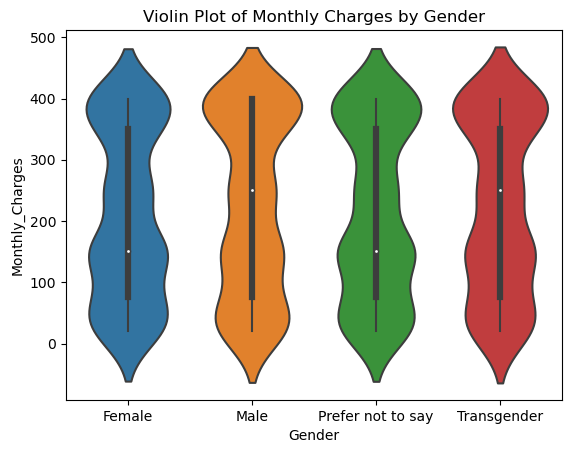

In [58]:
sns.violinplot(x='Gender', y='Monthly_Charges', data=df)
plt.title('Violin Plot of Monthly Charges by Gender')
plt.show()

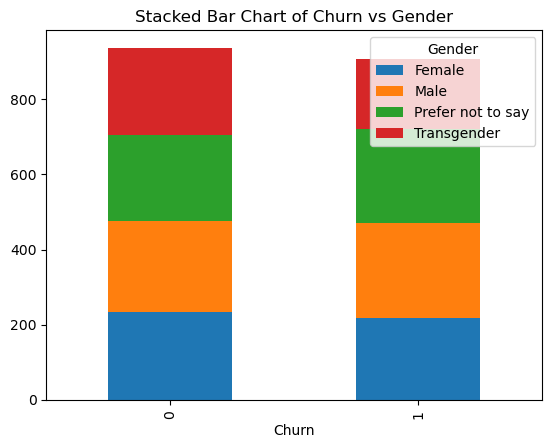

In [59]:
df.groupby(['Churn', 'Gender']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Churn vs Gender')
plt.show()

In [60]:
## Outlier Detection

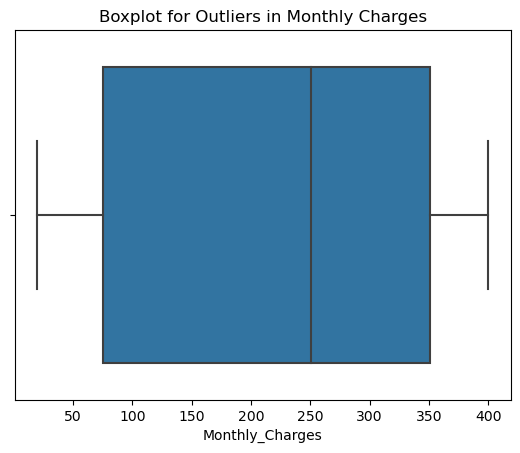

In [61]:
sns.boxplot(x='Monthly_Charges', data=df)
plt.title('Boxplot for Outliers in Monthly Charges')
plt.show()

In [62]:
df.columns

Index(['AgeGroup', 'Gender', 'Education', 'EmploymentStatus', 'TelecomCompany',
       'ReasonForChoosing', 'DurationWithCompany', 'PlanType', 'Churn',
       'ChurnReason_NetworkCoverage', 'ChurnReason_CustomerService',
       'ChurnReason_Pricing', 'ChurnLikelihood', 'MonthlyCharges_Numeric',
       'Gender_Numeric', 'AgeGroup_Numeric', 'Monthly_Charges',
       'DurationWithCompany_Numeric'],
      dtype='object')

In [63]:
## Training and testing for Modelling 

In [64]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']  # Or ChurnLikelihood if that's your target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
## %pip install xgboost

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# ✅ Step 1: One-hot encode all categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first avoids dummy trap

# ✅ Step 2: Define X and y
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# ✅ Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 4: Define and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# ✅ Step 5: Train, predict, and evaluate

# Store metrics as dictionaries
metrics = {
    "Accuracy": {},
    "Precision": {},
    "Recall": {},
    "F1 Score": {}
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, output_dict=True)

    # Extract precision, recall, and F1 scores for each model
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1 = report['macro avg']['f1-score']

    # Store the metrics in the dictionaries
    metrics["Accuracy"][name] = acc
    metrics["Precision"][name] = precision
    metrics["Recall"][name] = recall
    metrics["F1 Score"][name] = f1

    # Print detailed report for each model
    print(f"\n📌 {name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds, digits=4))

# Convert metrics dictionary to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Display the formatted metrics table for all models
print("\n📊 Model Performance Comparison:")
print(metrics_df.to_string(index=False))


📌 Logistic Regression Performance:
Accuracy: 0.5556
Precision: 0.5564
Recall: 0.5559
F1 Score: 0.5548
[[110  73]
 [ 91  95]]
              precision    recall  f1-score   support

           0     0.5473    0.6011    0.5729       183
           1     0.5655    0.5108    0.5367       186

    accuracy                         0.5556       369
   macro avg     0.5564    0.5559    0.5548       369
weighted avg     0.5564    0.5556    0.5547       369


📌 Random Forest Performance:
Accuracy: 0.8293
Precision: 0.8320
Recall: 0.8296
F1 Score: 0.8290
[[160  23]
 [ 40 146]]
              precision    recall  f1-score   support

           0     0.8000    0.8743    0.8355       183
           1     0.8639    0.7849    0.8225       186

    accuracy                         0.8293       369
   macro avg     0.8320    0.8296    0.8290       369
weighted avg     0.8322    0.8293    0.8290       369


📌 Decision Tree Performance:
Accuracy: 0.7913
Precision: 0.7913
Recall: 0.7913
F1 Score: 0.7913
[[1

In [70]:
## Visualising the results

Labels: ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost']
Accuracies: [0.5555555555555556, 0.8292682926829268, 0.7913279132791328, 0.7696476964769647]
Precisions: [0.5563699360341151, 0.8319526627218935, 0.7913263207380854, 0.7700088209350191]
Recalls: [0.5559227921734532, 0.829631588224925, 0.791292085316411, 0.769786708972325]


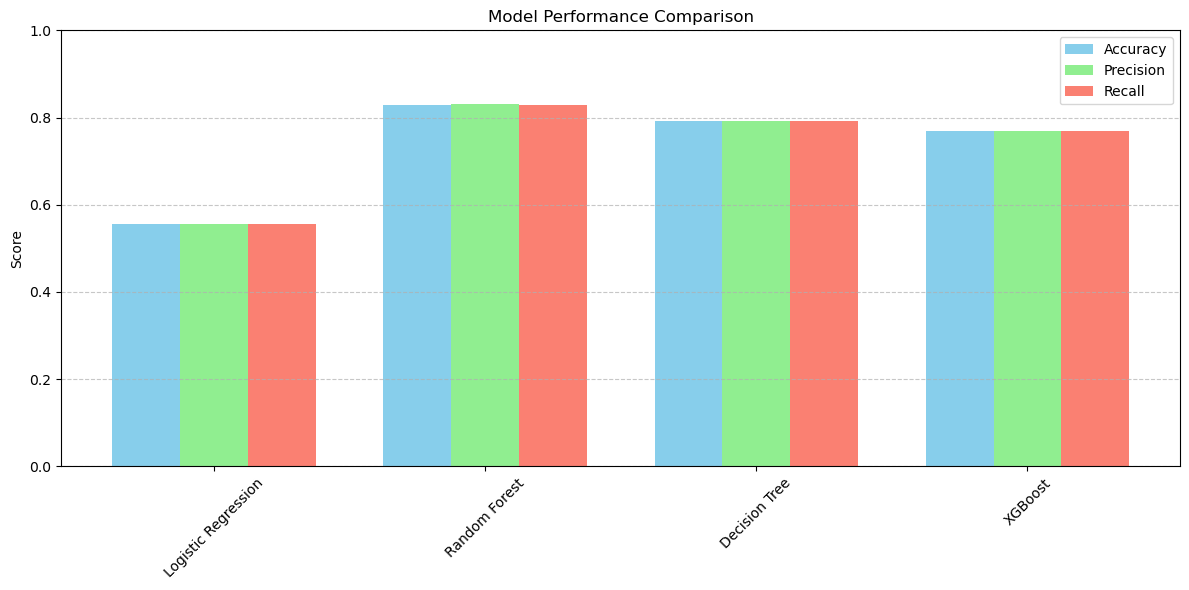

In [71]:
# ✅ Modified Plot: Safer & Robust Grouped Bar Chart
labels = list(models.keys())
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars

# Use .get() with default fallback to 0 if key is missing
accuracy_vals = [metrics["Accuracy"].get(model, 0) for model in labels]
precision_vals = [metrics["Precision"].get(model, 0) for model in labels]
recall_vals = [metrics["Recall"].get(model, 0) for model in labels]

# Debug print to verify data presence
print("Labels:", labels)
print("Accuracies:", accuracy_vals)
print("Precisions:", precision_vals)
print("Recalls:", recall_vals)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, accuracy_vals, width, label='Accuracy', color='skyblue')
ax.bar(x, precision_vals, width, label='Precision', color='lightgreen')
ax.bar(x + width, recall_vals, width, label='Recall', color='salmon')

ax.set_ylabel('Score')
ax.set_ylim(0, 1)
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [72]:
## Comparing model performance

In [73]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, output_dict=True)
    f1 = report['weighted avg']['f1-score']
    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

pd.DataFrame(results)

,Model,Accuracy,F1 Score
0,Logistic Regression,0.555556,0.554673
1,Random Forest,0.829268,0.828969
2,Decision Tree,0.791328,0.791322
3,XGBoost,0.769648,0.769600


In [74]:
## Checking Feature Importance

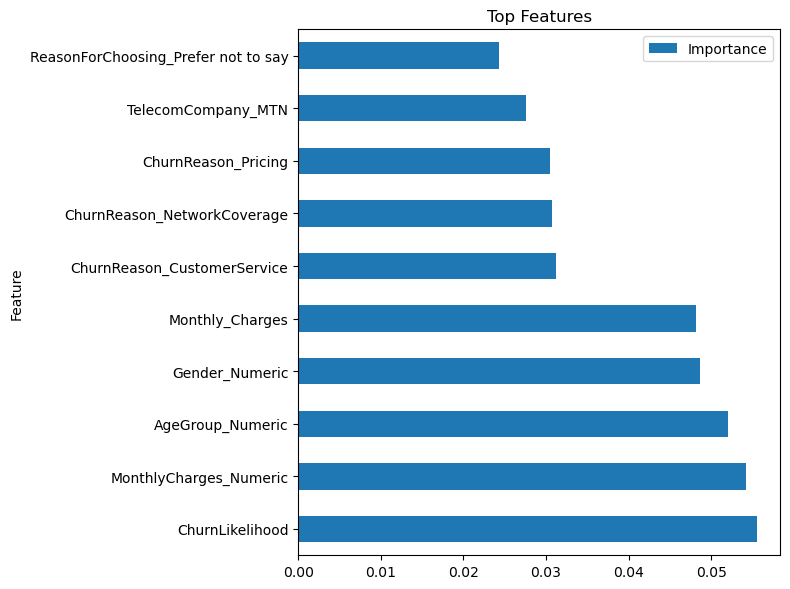

In [75]:
# For tree-based models
import matplotlib.pyplot as plt

rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
features = X.columns

# Plot
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False).head(10).plot(kind='barh', x='Feature', y='Importance', figsize=(8,6), title="Top Features")
plt.tight_layout()
plt.show()

In [76]:
## Hyper Parameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, None]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='f1_weighted')
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

Best Params: {'max_depth': None, 'n_estimators': 200}


In [78]:
## Deploying the best model

In [79]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [80]:
## Loading the Best Model and testing it

In [81]:
model = joblib.load('random_forest_model.pkl')
pred = pd.DataFrame(model.predict(X_test))

In [82]:
pred.head(10)

,0
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


### *** The END ***